<a href="https://colab.research.google.com/github/rookasrudzianskas/PytorchModels/blob/master/MODEL_TRAIN_open_source_ML_Model_Tested.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'1.12.1+cu113'

In [67]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [68]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [69]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [70]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  # Plot
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  plt.legend(prop={"size": 14})

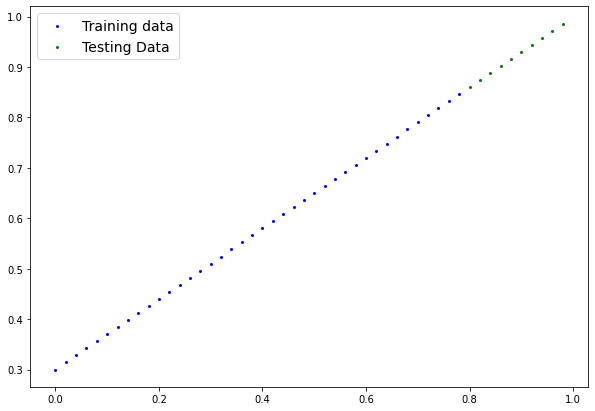

In [71]:
plot_predictions(X_train, y_train, X_test, y_test)

In [72]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # nn.Linear() for creating model params
    self.linear_layer = nn.Linear(in_features=1, out_features=1) # also called linear transform, probing layer

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [73]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [74]:
next(model_1.parameters()).device

device(type='cpu')

In [75]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [76]:
loss_fn = nn.L1Loss() # same as MEA

# optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [82]:
torch.manual_seed(42)

epochs = 200

# Put data on GPu
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # Forward pass
  Y_pred = model_1(X_train)

  # Calculate the loss
  loss = loss_fn(Y_pred, y_train)

  # Optimer zero grad
  optimizer.zero_grad()

  # Perform back propagation
  loss.backward()

  # Optimizer step
  # this adjust the model - or +
  optimizer.step()

  # Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss} | test loss: {test_loss}")

Epoch: 0 | Loss: 0.0012645035749301314 | test loss: 0.013801801018416882
Epoch: 10 | Loss: 0.0012645035749301314 | test loss: 0.013801801018416882
Epoch: 20 | Loss: 0.0012645035749301314 | test loss: 0.013801801018416882
Epoch: 30 | Loss: 0.0012645035749301314 | test loss: 0.013801801018416882
Epoch: 40 | Loss: 0.0012645035749301314 | test loss: 0.013801801018416882
Epoch: 50 | Loss: 0.0012645035749301314 | test loss: 0.013801801018416882
Epoch: 60 | Loss: 0.0012645035749301314 | test loss: 0.013801801018416882
Epoch: 70 | Loss: 0.0012645035749301314 | test loss: 0.013801801018416882
Epoch: 80 | Loss: 0.0012645035749301314 | test loss: 0.013801801018416882
Epoch: 90 | Loss: 0.0012645035749301314 | test loss: 0.013801801018416882
Epoch: 100 | Loss: 0.0012645035749301314 | test loss: 0.013801801018416882
Epoch: 110 | Loss: 0.0012645035749301314 | test loss: 0.013801801018416882
Epoch: 120 | Loss: 0.0012645035749301314 | test loss: 0.013801801018416882
Epoch: 130 | Loss: 0.001264503574930

In [83]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [84]:
weight, bias

(0.7, 0.3)

In [85]:
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test.to(device))
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

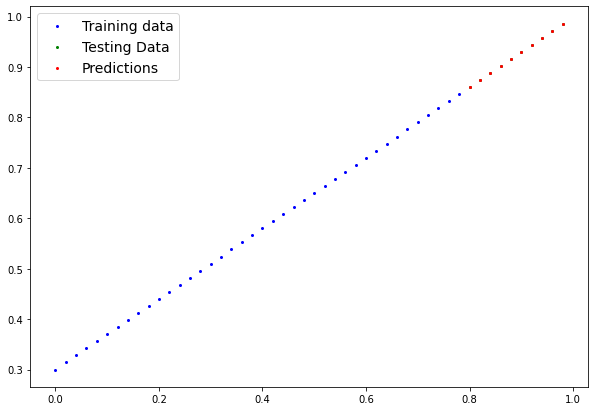

In [86]:
plot_predictions(predictions=y_preds.cpu())

In [89]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "02_pytorch_workflow_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")

torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/02_pytorch_workflow_model_2.pth


In [91]:
# Load model
loaded_model_1 = LinearRegressionModelV2()

# Load saved model_1 state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to the device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [94]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [95]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [97]:
# Evaluate
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')